这里讨论 
http://www.stat.umn.edu/geyer/s06/5102/notes/fish.pdf
一文的细节和一些实验

Fisher information在我的统计学习中主要出现在那个证明估计量最优性的方差Rao下界那里，说实话没什么映像。然而我又突然发现它就是困扰我已久
的极大似然估计的方差的（渐进）估计量，无需估计量的解析形式或贝叶斯化采样，可以说是频率主义硬肛的典型代表。算不出来就迭代，迭代丢掉
解析形式就上泰勒展开，上渐进估计。

这是我们想要讨论的主要结果：

单个极大似然估计量的渐进分布

$$
\begin{align}
\sqrt{n} (\hat{\theta}_n - \theta_0) &\to \frac{Z}{I_1(\theta_0)} \\
\end{align}
$$

以及类似的多元版本

$$
\hat{\mathbf{\theta}}_n \approx N(\mathbf{\theta},\mathbf{I}_n(\hat{\mathbf{\theta}})^{-1})
$$

其中$\mathbf{I}_n$为Fisher information matrix。从中容易对应估计量分量的标准差。

首先我们来回顾极大似然估计的解析性质，主要指通过使得对数似然函数导数为0的那个方程，我们用梯度下降得到的迭代解应与其等价。

通过将对数似然函数求导，可以得到score function:

$$
l_n'(\theta) = \sum_{i=1}^n \frac{\partial}{\partial \theta}\log f_\theta(X_i)
$$

使得score function为0的stationary point $l_n'(\theta_{MLP})=0$就是极大似然估计的解，
不过这是个一般函数求根的问题，一般比直接用对数似然函数梯度下降困难，不过我们可以讨论这个形式来获得一些性质。

首先对score function在某点$\theta_0$做带拉格朗日余项的泰勒展开：

$$
\begin{align}
l_n'(\theta) &= l_n'(\theta_0) + l_n''(\theta_0)(\theta - \theta_0) + \frac{1}{2}l_n'''(t)(\theta - \theta_0)^2 \\
t &\in \{ \min(\theta_0,\theta), \max(\theta_0,\theta) \}
\end{align}
$$

令$\theta_M$表示MLE的估计结果，将其代入（plug in）上式可得到：

$$
l_n'(\theta_M) = 0 = l_n'(\theta_0) + l_n''(\theta_0)(\theta_M - \theta_0) + \frac{1}{2}l_n'''(t)(\theta_M - \theta_0)^2
$$

注意这里上式里$l_n'(\theta)$在给定$\theta$后为一随机变量:

$$
l_n(\theta) = \sum_{i=1}^n \log f_\theta(X_i) \quad X_i \quad \text{i.i.d}
$$

而最大似然估计是使得$l_n(\theta)$为$0$的随机变量/估计量$\theta_{MLE}$，将它代回上式仍然有$0$.虽然我们常常讨论的是它的样本实现值。

由于$l_n'$与$l_n''$都是几个独立随机变量的和的形式，所以它们都渐进于正态分布，根据中心极限定理。我们来计算它们两个矩来确定这个分布是什么样子:

$$
\begin{align}
E(l_n'(\theta)) &= E \left( \frac{\partial}{\partial \theta} \sum_{i=1}^n \log f_\theta(X_i) \right) \\
&= \sum_{i=1}^n E \left( \frac{\partial}{\partial \theta} \log f_\theta(X_i)  \right) \\
&= \sum_{i=1}^n \int_{X_i} f_\theta(X_i) \frac{\partial}{\partial \theta} \log f_\theta(X_i) dX_i \\
&= \sum_{i=1}^n \int_{X_i} f_\theta(X_i) \frac{ \frac{\partial}{\partial \theta} f_\theta(X_i) }{f_\theta(X_i)} dX_i \\
&= \sum_{i=1}^n \int_{X_i} \frac{\partial}{\partial \theta} f_\theta(X_i)  dX_i \\
&= \sum_{i=1}^n \frac{\partial}{\partial \theta} \int_{X_i}  f_\theta(X_i)  dX_i \\
&= \sum_{i=1}^n \frac{\partial}{\partial \theta} 1 \\
&= \sum_{i=1}^n 0 = 0
\end{align}
$$

由于一阶矩为0，二阶矩也是它的方差

$$
\begin{align}
E(l_n'(\theta)^2) &= Var(l_n'(\theta)) \\
&= E \left( \left(\frac{\partial}{\partial \theta} \sum_{i=1}^n \log f_\theta(X_i) \right)^2 \right) \\
&= E \left( \left(\frac{\partial}{\partial \theta} \log f_\theta(X) \right)^2 \right) \\
&= \int_X  \left(\frac{\partial}{\partial \theta} \log f_\theta(X) \right)^2 f_\theta(X) dX
\end{align}
$$

还怎么继续做下去呢？并不能做下去，在一般形势下，所以我们称它为Fisher information $I_n(\theta)$，考虑到MLE是Fisher发明的，
他关注估计量的渐进分布和这些矩的性质再自然不过了。

recall Lindeberg–Lévy CLT:

设$X_i$为独立同分布样本，且存在两个矩$E(X_i) = \mu,Var(X_i) = \sigma^2$，则

$$
\sqrt{n} (\frac{1}{n} \sum_{i=1}^n X_i - \mu) \to N(0,\sigma^2)
$$

注意到$I_n(\theta)$共包含$n$个项，我们用$I_1(\theta)$表示只包含一个样本的Fisher information，即:
$$
\begin{align}
E(l_1'(\theta)^2) &=Var(l_1' (\theta))\\
&= E \left( \left(\frac{\partial}{\partial \theta} \log f_\theta(X_i) \right)^2 \right) \\
&= \int_{X_i}  \left(\frac{\partial}{\partial \theta} \log f_\theta(X_i) \right)^2 f_\theta(X_i) dX_i \\
&= I_1(\theta)
\end{align}
$$

则
$$
\begin{align}
\frac{1}{\sqrt{n}} (l_n'(\theta)) &= \sqrt{n} \frac{1}{n} \sum_{i=1}^n  \frac{\partial}{\partial \theta}\log f_\theta(X_i) \\
&= \sqrt{n} (\frac{1}{n} \sum_{i=1}^n \frac{\partial}{\partial \theta}\log f_\theta(X_i) - \mu) \quad (\mu = 0) \\
&\to N(0,I_1(\theta))
\end{align}
$$

再讨论$l_n''(\theta)=\sum_{i=1}^n \frac{\partial^2}{\partial \theta^2} \log f_\theta(X_i)$

$$
\begin{align}
E(l_1''(\theta)) &= E \frac{\partial^2}{\partial \theta^2} \log f_\theta(X_i) \\
&= \int_{X_i} f_\theta(X_i) \frac{\partial^2}{\partial \theta^2} \log f_\theta(X_i) dX_i \\
&= \int_{X_i} f_\theta(X_i) \frac{ 
\frac{\partial^2}{\partial \theta^2} f_\theta(X_i) f_\theta(X_i) - (\frac{\partial}{\partial \theta} f_\theta(X_i))^2
}{
f_\theta(X_i)^2
} dX_i \\
&= \int_{X_i} \frac{ 
\frac{\partial^2}{\partial \theta^2} f_\theta(X_i) f_\theta(X_i) - (\frac{\partial}{\partial \theta} f_\theta(X_i))^2
}{
f_\theta(X_i)
} dX_i \\
&= \int_{X_i} \frac{\partial^2}{\partial \theta^2} f_\theta(X_i) dX_i - 
\int_{X_i} \frac{(\frac{\partial}{\partial \theta} f_\theta(X_i))^2}{f_\theta(X_i)} dX_i \\
&= \frac{\partial^2}{\partial \theta^2} \int_{X_i} f_\theta(X_i) dX_i - 
\int_{X_i} f_\theta(X_i) \left( \frac{\frac{\partial}{\partial \theta} f_\theta(X_i)}{f_\theta(X_i)} \right)^2 dX_i \\
&= \frac{\partial^2}{\partial \theta^2} 1 - 
\int_{X_i} f_\theta(X_i) \left( \frac{\partial}{\partial \theta} \log f_\theta(X_i) \right)^2 dX_i \\
&= -I_1(X_i)
\end{align} 
$$

又假设它符合大数定理的条件，则

$$
\frac{1}{n} l''_n(\theta) \to -I_1(\theta)
$$

讨论这两个渐进性质是为了利用那个涉及$\theta_M$的方程，有：

$$
\frac{1}{\sqrt{n}} l'_n(\theta_M) = \frac{1}{\sqrt{n}} 0 = 0 =
\frac{1}{\sqrt{n}} \left( l_n'(\theta_0) + l_n''(\theta_0)(\theta_M - \theta_0) + \frac{1}{2}l_n'''(t)(\theta_M - \theta_0)^2 \right) =
\frac{1}{\sqrt{n}} l_n'(\theta_0)+ \frac{1}{n}l_n''(\theta_0) \sqrt{n}(\theta_M - \theta_0) + \frac{1}{2\sqrt{n}}l_n'''(t)(\theta_M - \theta_0)^2
$$

对于三阶项$\frac{1}{2\sqrt{n}}l_n'''(t)(\theta_M - \theta_0)^2$，
我们假设它会趋于0（至于实际的条件是怎么样的，需要更高级的统计学知识，而且即使你知道了真用起来还是相当于直接假设）,则有

$$
\begin{align}
0 &= 
\frac{1}{\sqrt{n}} l_n'(\theta_0)+ 
\frac{1}{n}l_n''(\theta_0) \sqrt{n}(\theta_M - \theta_0) + 
\frac{1}{2\sqrt{n}}l_n'''(t)(\theta_M - \theta_0)^2 \\
&\to 
Z - I_1(\theta_0) \sqrt{n}(\theta_M - \theta_0) + 0 \\
Z &\sim N(0,I_1(\theta_0))
\end{align}
$$

则：

$$
\begin{align}
\sqrt{n}(\theta_M - \theta_0) &\to \frac{Z}{I_1(\theta_0)} \\
\theta_M  &\to N(\theta_0,\frac{1}{nI_1(\theta_0)})
\end{align}
$$

虽然这个论证的大多数部分在$\theta_0$取任意值，特别是真实值以外的值时候都成立，但显然它不能趋于每个数。主要因为$\theta_M$一致性，所以
二阶项中的$\theta_M - \theta_0$当然只有$\theta_0$取$\theta_M$以一致性逼近的真实值时才能趋于0.

当然Fisher信息量其实是参数（$l_n(\theta)$这些是带参数的随机变量），那么我们怎么估计它呢。容易想到用$\theta_M$取代$\theta$，然后用解析期望
算。另一种算法不用计算解析期望（反正本来也不精确）,设观测（样本）Fisher information为

$$
J_n(\theta) = -l_n''(\theta) = \sum_{i=1}^n \frac{\partial^2}{\partial \theta^2} \log f_\theta(X_i)
$$

直观地看它有性质：

$$
J_n(\theta) \to nI(\theta) = I_n(\theta)
$$

注意$I(\theta),J(\theta)$都不是估计量，它们的估计都要做将$\theta$换成$\theta_M$这个影响没有被分析的操作。当然在渐进意义上它们的差别
可以被忽略，毕竟那个分布本来也是渐进的。

下面讨论多参数情况，梯度的一个维度对一个参数求偏导时其他参数保持不变：

$$
\nabla l_n(\theta) = \begin{bmatrix}
\frac{\partial l_n(\theta)}{\partial \theta_1} \\
\frac{\partial l_n(\theta)}{\partial \theta_2} \\
\vdots \\
\frac{\partial l_n(\theta)}{\partial \theta_d} 
\end{bmatrix}
$$

注意这个梯度在求剃度以后带入了iid样本，所以是随机向量。而这个性质是可以直接由单变量结果得到：

$$
E(\nabla l_n(\theta)) = \mathbf{0}
$$

除了梯度代入随机变量构成随机向量，我们还可以考虑Hessian矩阵

$$
\nabla^2 l_n(\theta) = \begin{bmatrix}
\frac{\partial^2 l_n(\theta)}{\partial \theta_1^2} & \dots & \frac{\partial^2 l_n(\theta)}{\partial \theta_1 \theta_d} \\
\vdots & \ddots & \vdots \\
\frac{\partial^2 l_n(\theta)}{\partial \theta_d \theta_1} & \dots & \frac{\partial^2 l_n(\theta)}{\partial \theta_d^2} \\
\end{bmatrix}
$$

这个矩阵也是随机的，有趣的是随机梯度的协方差矩阵与随机Hessian矩阵的期望的下述关系，和以前一样，不能进一步求解的方差矩阵被称为
Fisher information matrix.

$$
I_n(\theta) = Var_\theta(\nabla l_n(\theta)) = -E_\theta(\nabla^2 l_n(\theta))
$$

它的推导类似于前面，即分成两部分，有一个项可以移出去之类的。

也可以定义免于期望的可观测Fisher information。

$$
J_n(\theta) = - \nabla^2 l_n(\theta) \to nI(\theta) = I_n(\theta)
$$

对于渐进分布，recall central limit theorem for multivariate：

设$X_i$为独立同分布的随机向量且$E(X_i) = \mu,Var(X_i) = \Sigma$，则：

$$
\sqrt{n} (\frac{1}{n} \sum_{i=1}^n X_i - \mu) \to N(0,\Sigma)
$$

照搬前面代入泰勒展开的操作，我们先给出多元泰勒展开:

$$
\nabla l_n (\theta_M) = \mathbf{0} = 
\nabla l_n(\theta_0) +  \nabla^2 l_n(\theta_0)(\theta_M - \theta_0) + O
$$

首先，根据前面的多元中心极限定理

$$
\begin{align}
\frac{1}{\sqrt{n}} \nabla l_n(\theta) &=\sqrt{n} (\frac{1}{n} \nabla l_n(\theta) - E(l_n(\theta))) \to Z \\
Z &\sim N(0,I_1(\theta))
\end{align}
$$

各个元素分别运用大数定律可得：

$$
\frac{1}{n} \nabla^2 l_n(\theta_0) \to -I_1(\theta) 
$$

于是：

$$
\begin{align}
\frac{1}{\sqrt{n}} \nabla l_n(\theta_M) &= \frac{1}{\sqrt{n}} \mathbf{0} = \mathbf{0}  \\
&= \frac{1}{\sqrt{n}} \nabla l_n(\theta_0) + \frac{1}{n} \nabla^2 l_n(\theta_0) \sqrt{n} (\theta_M - \theta_0) + \frac{1}{\sqrt{n}} O \\
&\to Z - I_1(\theta) \sqrt{n} (\theta_M - \theta_0) 
\end{align}
$$

thus:

$$
\begin{align}
I_1(\theta) \sqrt{n} (\theta_M - \theta_0) &= Z \\
\theta_M - \theta_0 &= \frac{1}{\sqrt{n}} I_1(\theta)^{-1} Z \\ 
I_1^{-1} Z &\sim N(\mathbf{0},(I_1^{-1}(\theta))' I_1(\theta) I_1^{-1}(\theta)) = N(\mathbf{0},( I_1^{-1}(\theta)) \\
\theta_M - \theta_0 &=\frac{1}{\sqrt{n}} I_1(\theta)^{-1} Z \sim  N(\mathbf{0},(\frac{1}{n} I_1^{-1}(\theta)) = N(\mathbf{0},I_n^{-1}(\theta)) \\
\theta_M &\sim N(\theta_0,I_n^{-1}(\theta))
\end{align}
$$

这就是多参数极大似然估计量的渐进分布。

# 实验

下面我们进行一些实验，首先我们来估计一个正态总体的期望，显然这里的极大似然估计等价于矩估计，即直接平均（方差就不是了）。
这里我们假设数据来自$N(0,1^2)$分布，所以我们知道估计量$\bar{X}$的真实方差为:

$$
Var(\frac{1}{n} \sum_{i=1}^nX_i) = \frac{1}{n^2} \sum_{i=1}^n Var(X_i) = \frac{1}{n}
$$

估计量$\bar{X}$的渐进分布是

$$
\bar{X} \to N(0,\frac{1}{nI_1(\theta)}) = N(0,\frac{1}{I_n(\theta)})
$$

Fisher信息量$I_1(\theta)$实际上是只有一个样本时的score函数（似然函数对对应参数求一阶导数后的导函数）$l_1'(x)$
将$x$换成随机变量$X$后取方差（期望Fisher信息量，或者说二阶矩的期望，因为一阶矩为0，二阶矩与方差相等）
或代入一个样本值后计算二阶矩得到的信息量（可观测Fisher信息量）。

$$
\begin{align}
\frac{\partial}{\partial \mu} \log N(X ; \mu,\sigma^2) 
&= \frac{\partial}{\partial \mu} -\frac{(X-\mu)^2}{2\sigma^2} \\
&= \frac{X-\mu}{\sigma^2} \\
I_1(\mu) &= Var(\frac{\partial}{\partial \mu} \log N(X ; \mu,\sigma^2)) \\
&= E(\frac{\partial}{\partial \mu} \log N(X ; \mu,\sigma^2))^2 \\
&= E\left( \left(\frac{X-\mu}{\sigma^2} \right)^2 \right) \\
&= \frac{1}{\sigma^4} E(X^2 + \mu^2 - 2X\mu) \\
&= \frac{1}{\sigma^4} (\mu^2 + \sigma^2 + \mu^2 - 2\mu^2) \\
&= \frac{1}{\sigma^2} \\
I_n(\mu) &= \frac{n}{\sigma^2} \\
J_1(\mu) &= \left(\frac{X_i-\mu}{\sigma^2} \right)^2 \\
J_n(\mu) &= \sum_{i=1}^n \left(\frac{X_i-\mu}{\sigma^2} \right)^2
\end{align}
$$

在这个例子中，作为参数的期望Fisher信息量给出的标准差与真实标准差形式一致，
当然期望Fisher标准差要估计的话要把$\sigma$换成估计值$\sigma_M$，那就是个
普通的采样分布。而可观测Fisher信息量则既不是参数也不是估计量（包含了样本就不是参数，包含了参数就不是估计量），
它的估计量要比期望Fisher信息量要简单一点，不用积分，直接换掉score function上对应的参数即可。

使用pytorch时，因为它不能直接计算出二阶导数，而我们经常写出对数似然函数喂给它。所以在结束迭代时我们可以收集到
各个被优化参数当时的梯度/偏导数信息，这正是（取决于具体的更新时机，这可能是正好是输出的MLE估计或前一次迭代的导数，不过既然迭代收敛了，
这两个值应该很接近）score function在各个参数的取值（$n$版本的，使用batch时为batch上那些样本的，我们可能需要手动跑一次全样本的计算获得
正确的n梯度，考虑到$I_n$已经包含了n的信息，若直接使用batch的将低估Fisher information并高估MLE估计量渐进方差）

EMMM，突然发现不对，因为可观测Fisher information是计算:

$$
J_n(\theta) = \sum_{i=1}^n \left(\frac{\partial}{\partial \theta} \log f_\theta(X_i) \right)^2
$$

然而综合到一个参数上的梯度实际上是:

$$
\nabla_\theta = \sum_{i=1}^n \frac{\partial}{\partial \theta} \log f_\theta(X_i) 
$$

所以它平方并不是$J_n$要那么算我们得每次输入一个样本获得梯度，平方后再加起来，无力吐槽。

或者也可以模拟计算二阶导数，利用

$$
J_n(\theta)  = \sum_{i=1}^n \frac{\partial^2}{\partial \theta^2} \log f_\theta(X_i)
$$

然后保留全数据不变，每次手动修改一个参数的值（以及调回来）去模拟计算一个小差分，再模拟计算梯度。EMMM。。。

In [1]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

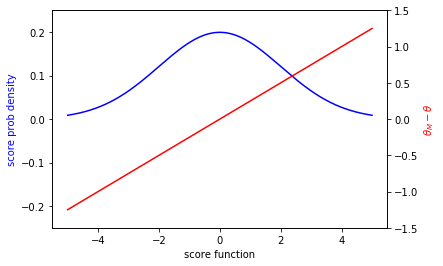

In [14]:
sigma = 0.5

x = np.linspace(-5,5,1000)

score_dis = stats.norm(loc=0,scale=1./sigma)

left = plt.gca()
right = left.twinx()
left.plot(x,score_dis.pdf(x),label='score',color='b')
right.plot(x,x*sigma**2,label=r'$\theta_M - \theta$',color='r')

left.set_ylim(-0.25,0.25)
right.set_ylim(-1.5,1.5)
#plt.legend()
left.set_xlabel('score function')
left.set_ylabel('score prob density',color='b')
right.set_ylabel(r'$\theta_M - \theta$',color='r')


In [36]:
score_dis.ppf(0.9)

2.5631031310892007

In [73]:
def plot_twin(sigma, sig=0.05,margain=0.05):

    x = np.linspace(-5,5,1000)

    score_dis = stats.norm(loc=0,scale=1./sigma)
    score_dis_pdf = score_dis.pdf(x)
    left_sig,right_sig = score_dis.ppf(sig),score_dis.ppf(1-sig)
    x_left = x[x<left_sig]
    x_right = x[x>right_sig]
    
    left_up = score_dis_pdf.max() + margain
    left_bottom = -left_up

    left = plt.gca()
    right = left.twinx()
    left.plot(x,score_dis_pdf,label='score',color='b')
    left.fill_between(x_left,0,score_dis.pdf(x_left))
    left.fill_between(x_right,0,score_dis.pdf(x_right))
    left.vlines([left_sig,right_sig],left_bottom,left_up,alpha=0.5)
    left.plot([-5,5],[0,0],color='black',alpha=0.1)
    
    
    right.plot(x,x*sigma**2,label=r'$\theta_M - \theta$',color='r')

    left.set_xlim(-5,5)
    left.set_ylim(left_bottom,left_up)
    right.set_ylim(-3.5,3.5)
    right.plot([-5,5],[left_sig*sigma**2]*2,alpha=0.3,color='black')
    right.plot([-5,5],[right_sig*sigma**2]*2,alpha=0.3,color='black')
    #plt.legend()
    left.set_xlabel('score function')
    left.set_ylabel('score prob density',color='b')
    right.set_ylabel(r'$\theta_M - \theta$',color='r')
    
    plt.title(f'$\\sigma$={sigma}  {str(100*(1-margain*2))}% interval: ({left_sig*sigma**2:.3f},{right_sig*sigma**2:.3f})')

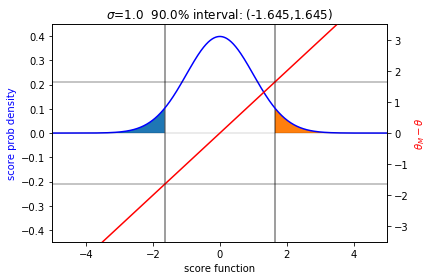

In [74]:
plot_twin(1.0)

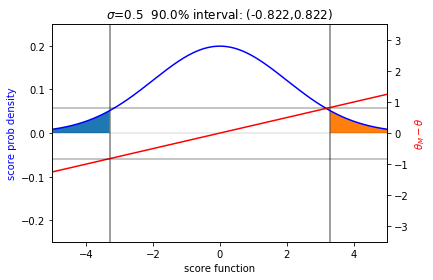

In [75]:
plot_twin(0.5)

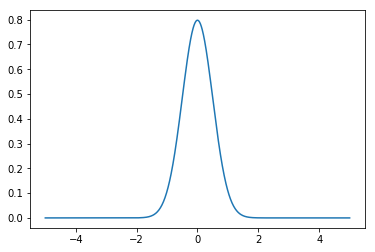

In [5]:
mle_dis = stats.norm(loc=0,scale=sigma) #也是x的分布
plt.plot(x,mle_dis.pdf(x))


In [45]:
plt.vlines?

有些讨论放到知乎上了，懒得再搬回来

https://www.zhihu.com/question/26561604/answer/402120809